In [19]:
%matplotlib inline
from Bio import SeqIO
import seaborn as sns

from scipy.stats import mode

In [20]:
src = 'output_files/job_output_ccs_barcode/tasks/pbcoretools.tasks.bam2fastq_ccs-0/ccs.20_21.fastq' 

In [33]:
! ls output_files/job_output_ccs_barcode/tasks/pbcoretools.tasks.bam2fastq_ccs-0/*fastq | wc -l 

      37


In [35]:
! ls output_files/job_output_laa_bc_revrc/tasks/pbcoretools.tasks.split_laa_fastq-0/*fastq | wc -l 

      21


In [21]:
lens = []
for rec in SeqIO.parse( src, 'fastq' ):
    lens.append(len(rec))

/usr/local/bin/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


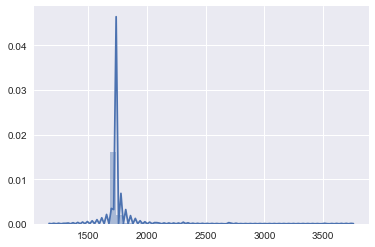

In [22]:
sns.distplot(lens)

In [23]:
mode(lens)

ModeResult(mode=array([1733]), count=array([85]))

In [24]:
fn = SeqIO.parse(src, 'fastq')
wanted = [r for r in fn if len(r)==1733]
SeqIO.write(wanted, 'analysis_results/wanted.fasta', 'fasta')

85

/usr/local/bin/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/bin/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


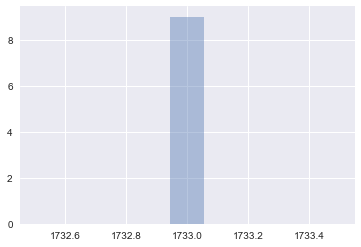

In [30]:
lens2 = []
for rec in wanted: 
    lens2.append(len(rec))
sns.distplot(lens2)

In [26]:
!ls analysis_results/

ccs.26_27.fastq         wanted.fastq            wanted_clus.fastq
ccs.26_27.fastq.clstr   wanted_clus.fasta       wanted_clus.fastq.clstr
wanted.fasta            wanted_clus.fasta.clstr


In [28]:
! mafft analysis_results/wanted.fasta


nthread = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 85
done.

Constructing a UPGMA tree (efffree=0) ... 
   80 / 85
done.

Progressive alignment 1/2... 
STEP    46 / 84 f
Reallocating..done. *alloclen = 4468
STEP    84 / 84 d
done.

Making a distance matrix from msa.. 
    0 / 85
done.

Constructing a UPGMA tree (efffree=1) ... 
   80 / 85
done.

Progressive alignment 2/2... 
STEP    62 / 84 f
Reallocating..done. *alloclen = 4468
STEP    84 / 84 f
done.

disttbfast (nuc) Version 7.305b alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oc